## **Proyecto de investigación Jax**
#### Hecho por : Carlos López Muñoz
#### Fecha : 28 / 01 / 2025

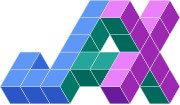

## ¿Qué es JAX y cuáles son sus principales características?
### JAX: Biblioteca de Computación Numérica de Alto Rendimiento

**JAX** es una biblioteca de Python desarrollada por *Google Research* que se especializa en computación numérica de alto rendimiento. Ofrece capacidades de **diferenciación automática** y **compilación just-in-time (JIT)** para optimizar y acelerar cálculos en hardware como **GPUs** y **TPUs**. Su API es similar a la de **NumPy**, lo que facilita su adopción para quienes ya están familiarizados con esta biblioteca.




## Características destacadas

- **Diferenciación automática**:  
  Permite calcular derivadas de funciones de manera eficiente, esencial para el entrenamiento de modelos de aprendizaje profundo.

- **Compilación Just-In-Time (JIT)**:  
  Optimiza funciones de Python en código máquina eficiente, mejorando el rendimiento en hardware acelerado.

- **Vectorización y paralelismo**:  
  Facilita la ejecución eficiente de código en diferentes plataformas de hardware.

¡ Lleva tus cálculos al siguiente nivel! 🚀

-------------------------------------------------------------------------------------------

## Comparación de JAX, TensorFlow y PyTorch

**JAX**, **TensorFlow** y **PyTorch** son marcos populares para el desarrollo de modelos de aprendizaje profundo, cada uno con sus propias fortalezas:

#### **TensorFlow**
- **Desarrollador**: Google Brain  
- **Lanzamiento**: 2015  
- **Fortalezas**:  
  - Marco maduro que admite una amplia gama de tareas de aprendizaje automático.  
  - Control de bajo nivel sobre la arquitectura del modelo.  
  - Amplia selección de plataformas disponibles, desde dispositivos móviles hasta sistemas distribuidos a gran escala.  

####  **PyTorch**
- **Desarrollador**: Laboratorio de Investigación de IA de Facebook  
- **Lanzamiento**: 2016  
- **Fortalezas**:  
  - Popular por su **facilidad de uso** y su **gráfico computacional dinámico**, que permite:  
    - Depuración más sencilla.  
    - Modificaciones en tiempo de ejecución.  
  - Especialmente apreciado en la comunidad de investigación.  

#### **JAX**
- **Desarrollador**: Google Research  
- **Lanzamiento**: 2018 base
- **Lanzamiento**: 2020 suficientemente adaptada para ser considerada como una herramienta para redes neuronales.  
- **Fortalezas**:  
  - Enfoque **funcional** y capacidades avanzadas:  
    - **Diferenciación automática**.  
    - **Compilación Just-In-Time (JIT)**.  
  - Alto rendimiento y flexibilidad, ideal para proyectos de investigación avanzados.  
  - Utilizado por equipos como DeepMind y Google AI.

---

Cada marco tiene su nicho:  
- **TensorFlow** es ideal para aplicaciones de producción escalables.  
- **PyTorch** sobresale en investigación y desarrollo iterativo.  
- **JAX** se centra en optimizar el rendimiento y la diferenciación automática en hardware acelerado. 🚀


---
## Ecosistema: Librerías implementadas sobre JAX y herramientas relacionadas

El ecosistema de **JAX** está en crecimiento y cuenta con varias bibliotecas y herramientas que amplían sus capacidades:

### Bibliotecas principales

- **Flax**  
  Una biblioteca de alto nivel para la construcción de redes neuronales sobre JAX, desarrollada por Google. Ofrece un diseño modular que facilita la personalización y la separación de la lógica del modelo y el entrenamiento.

- **Optax**  
  Una biblioteca de optimización que proporciona una variedad de algoritmos de optimización para el entrenamiento de modelos en JAX.

- **Haiku**  
  Desarrollada por DeepMind, es otra biblioteca de alto nivel que simplifica la construcción de modelos de aprendizaje profundo con JAX, siguiendo un enfoque simple y flexible.

### Integración con otras herramientas

JAX se integra perfectamente con otras herramientas y bibliotecas del ecosistema de Python, como:

- **NumPy**  
  Para operaciones matemáticas avanzadas y manejo de arreglos.

- **SciPy**  
  Para cálculos científicos y algoritmos optimizados.

Estas integraciones facilitan la adopción de JAX en proyectos existentes, combinando potencia y flexibilidad.


# • Ejemplo práctico.

Par este ejemplo utilizaremos el dataset wine de sklearn. Este dataset contiene características químicas y organolépticas de vinos y su calidad clasificada en 3 categorías. Haremos un clasificador que diga si un vino es malo, normal o bueno.

In [1]:
!pip install -q jax jaxlib jax_metrics optax

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 1.2 MB/s eta 0:00:00


In [2]:
# Importación de librerias que usaremos.
import jax
import jax.numpy as jnp
from jax import grad, jit, vmap
from jax import random
from jax.example_libraries import stax
import jax_metrics as jm
import matplotlib.pyplot as plt
import optax
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
# Carga de datos
dataset = load_wine()

In [4]:
# Comprobación de que el dataset se ha cargado correctamente.
print(dataset.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [5]:
# Datos de cada muestra de vino
dataset.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [6]:
# Matríz de las caracteristicas
X = dataset.data
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [7]:
# Forma de la matríz
X.shape

(178, 13)

In [8]:
# Seleccionamos el target
y = dataset.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [9]:
# Categorías unicas del target
jnp.unique(y)

Array([0, 1, 2], dtype=int32)

In [10]:
# Cuenta cuántos casos hay en cada categoría.
jnp.bincount(y)

Array([59, 71, 48], dtype=int32)

In [11]:
# Guarda en un diccionario cuántas ocurrencias hay para cada categoria.
categorias, cantidad = jnp.unique(y, return_counts=True)
# Convert JAX arrays to Python lists before creating the dictionary.
params = dict(zip(categorias.tolist(), cantidad.tolist()))

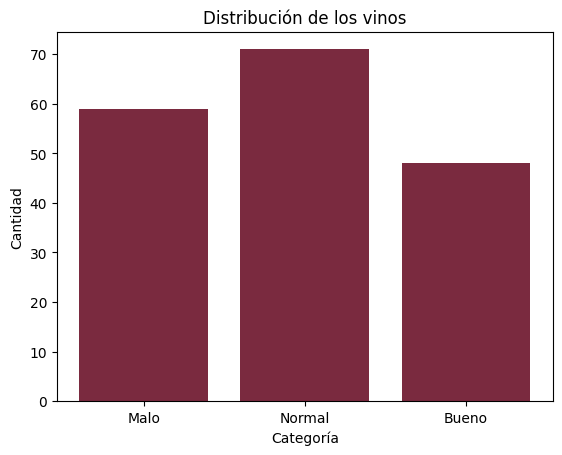

In [12]:
# Gráfica de la distribuición de los vinos.
x = [0,1,2]
labels = ["Malo","Normal","Bueno"]
color_vino = "#7a2a3f"
plt.bar(categorias, cantidad, color=color_vino)
plt.xticks(x,labels)
plt.xlabel('Categoría')
plt.ylabel('Cantidad')
plt.title('Distribución de los vinos')
plt.show()

In [13]:
# Datos de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


1. **`scaler = StandardScaler()`**  
   - Crea un objeto para estandarizar los datos, ajustando las características a media 0 y desviación estándar 1.

2. **`X_train = scaler.fit_transform(X_train)`**  
   - Calcula la media y desviación estándar de `X_train` (con `fit`) y lo estandariza (con `transform`).

3. **`X_test = scaler.transform(X_test)`**  
   - Estandariza `X_test` usando las estadísticas calculadas en `X_train` para mantener consistencia.


In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
print("Forma de X_train:", X_train.shape)  # Ejemplo: (142, 13)
print("Forma de X_test:", X_test.shape)    # Ejemplo: (30, 13)

Forma de X_train: (142, 13)
Forma de X_test: (36, 13)


1. **`key = random.PRNGKey(0)`**  
   - Genera una clave aleatoria inicial para la librería JAX, basada en un generador de números pseudoaleatorios (PRNG). El argumento `0` es la semilla que asegura reproducibilidad.


In [16]:
# Generar clave aleatoria
key = random.PRNGKey(0)

In [17]:
# --------------------------------------
# Paso 1: Verificar formas de X_train y X_test
# --------------------------------------
print("Forma original de X_train:", X_train.shape)
print("Forma original de X_test:", X_test.shape)


Forma original de X_train: (142, 13)
Forma original de X_test: (36, 13)


1. **stax.serial**
   - Es una función de JAX que permite construir un modelo secuencial, donde las capas están organizadas en el orden en que se definen.
   - El modelo resultante devuelve tres funciones principales:  
     - **`init_fn`**: Inicializa los parámetros del modelo.  
     - **`apply_fn`**: Aplica el modelo a los datos de entrada para calcular salidas.

2. **Modelo definido**
   - **`stax.Dense(16)`**: Capa completamente conectada con 16 neuronas.
   - **`stax.Relu`**: Función de activación ReLU, que aplica `max(0, x)` a cada neurona.
   - **`stax.Dense(8)`**: Capa completamente conectada con 8 neuronas.
   - **`stax.Relu`**: Otra capa con activación ReLU.
   - **`stax.Dense(3)`**: Capa completamente conectada con 3 neuronas, que define la salida.
   - **`stax.Softmax`**: Función de activación Softmax, usada comúnmente en problemas de clasificación multiclase para convertir las salidas en probabilidades.

In [18]:
# --------------------------------------
# Paso 2: Definir el modelo
# --------------------------------------
init_fn, apply_fn = model = stax.serial(
    stax.Dense(16),
    stax.Relu,
    stax.Dense(8),
    stax.Relu,
    stax.Dense(3),
    stax.Softmax
)

1. **`input_shape = (-1, X_train.shape[1])`**
   - Define la forma esperada de los datos de entrada al modelo.
   - `-1` indica que el tamaño del batch es dinámico (puede variar).
   - `X_train.shape[1]` define el número de características (o columnas) en los datos de entrada.

2. **`_, params = init_fn(key, input_shape)`**
   - **`init_fn`**: Inicializa los parámetros del modelo usando:
     - **`key`**: La clave aleatoria generada previamente (para control reproducible).
     - **`input_shape`**: La forma de los datos de entrada.
   - Retorna dos valores:
     - **`_`**: La salida no utilizada (típicamente la forma de salida del modelo).
     - **`params`**: Los parámetros inicializados del modelo (pesos y sesgos de las capas).

In [19]:
# Inicializar parámetros
input_shape = (-1, X_train.shape[1])  # Formato (batch_size, n_features)
_, params = init_fn(key, input_shape)

1. **jax.nn.one_hot**
   - Convierte las etiquetas en formato entero (por ejemplo, `0`, `1`, `2`) a un formato **One-Hot Encoding**, donde cada etiqueta se representa como un vector binario.  

In [20]:
# --------------------------------------
# Paso 3: One-Hot Encoding de las etiquetas
# --------------------------------------
y_train_onehot = jax.nn.one_hot(y_train, num_classes=3)
y_test_onehot = jax.nn.one_hot(y_test, num_classes=3)

1. **compute_loss(params, x, y)**
   - Define la función de pérdida:
     - **`apply_fn(params, x)`**: Aplica el modelo a los datos de entrada `x` usando los parámetros actuales (`params`) y calcula las probabilidades (logits).
     - **`optax.softmax_cross_entropy(logits, y)`**: Calcula la pérdida por entropía cruzada entre las predicciones (`logits`) y las etiquetas verdaderas (`y`) en formato One-Hot.
     - **`jnp.mean(...)`**: Promedia la pérdida para todo el lote.

2. **optimizer = optax.adam(learning_rate=0.001)**
   - Se crea un optimizador **Adam** con una tasa de aprendizaje de `0.001`. Adam es un algoritmo de optimización avanzado que ajusta dinámicamente la tasa de aprendizaje para cada parámetro.

3. **opt_state = optimizer.init(params)**
   - Inicializa el estado del optimizador con los parámetros del modelo (`params`).
   - Este estado incluye información necesaria para el cálculo de los ajustes durante el entrenamiento, como los gradientes acumulados y las actualizaciones de momento.


In [21]:
# --------------------------------------
# Paso 4: Definir pérdida y optimizador
# --------------------------------------
def compute_loss(params, x, y):
    logits = apply_fn(params, x)  # Salida del modelo (probabilidades)
    return jnp.mean(optax.softmax_cross_entropy(logits, y))

optimizer = optax.adam(learning_rate=0.001)
opt_state = optimizer.init(params)

1. **@jax.jit**
   - Compila la función `update` usando JIT (Just-In-Time compilation) para mejorar el rendimiento, aprovechando la aceleración en dispositivos como GPUs o TPUs.

2. **def update(params, opt_state, x, y):**
   - Define la función que actualiza los parámetros del modelo en un paso de entrenamiento.

3. **grads = jax.grad(compute_loss)(params, x, y)**
   - Calcula los gradientes de la función de pérdida (`compute_loss`) con respecto a los parámetros (`params`), usando diferenciación automática de JAX.

4. **updates, new_opt_state = optimizer.update(grads, opt_state)**
   - Usa el optimizador para calcular las actualizaciones (`updates`) basadas en los gradientes (`grads`) y el estado actual del optimizador (`opt_state`).
   - Devuelve el nuevo estado del optimizador (`new_opt_state`).

5. **new_params = optax.apply_updates(params, updates)**
   - Aplica las actualizaciones a los parámetros actuales (`params`) para obtener los nuevos parámetros (`new_params`).

6. **return new_params, new_opt_state**
   - Devuelve los nuevos parámetros del modelo y el nuevo estado del optimizador, listos para el siguiente paso de entrenamiento.


In [22]:
# --------------------------------------
# Paso 5: Función de actualización
# --------------------------------------
@jax.jit
def update(params, opt_state, x, y):
    grads = jax.grad(compute_loss)(params, x, y)
    updates, new_opt_state = optimizer.update(grads, opt_state)
    new_params = optax.apply_updates(params, updates)
    return new_params, new_opt_state

1. **num_epochs = 200**
   - Define el número total de épocas para el entrenamiento, donde una época es un pase completo por el conjunto de datos de entrenamiento.

2. **for epoch in range(num_epochs):**
   - Itera sobre el rango de épocas, actualizando los parámetros del modelo en cada iteración.

3. **params, opt_state = update(params, opt_state, X_train, y_train_onehot)**
   - Llama a la función `update` para realizar un paso de entrenamiento:
     - Calcula los gradientes.
     - Actualiza los parámetros del modelo (`params`) y el estado del optimizador (`opt_state`) usando los datos de entrada `X_train` y las etiquetas One-Hot `y_train_onehot`.

4. **if epoch % 100 == 0:**
   - Cada 100 épocas, evalúa la pérdida actual del modelo.

5. **loss = compute_loss(params, X_train, y_train_onehot)**
   - Calcula la pérdida en el conjunto de entrenamiento con los parámetros actualizados.

6. **print(f"Epoch {epoch}, Loss: {loss:.4f}")**
   - Imprime el número de época y el valor de la pérdida, facilitando el monitoreo del progreso del entrenamiento.


In [23]:
# --------------------------------------
# Paso 6: Entrenamiento
# --------------------------------------
num_epochs = 200

for epoch in range(num_epochs):
    params, opt_state = update(params, opt_state, X_train, y_train_onehot)
    if epoch % 100 == 0:
        loss = compute_loss(params, X_train, y_train_onehot)
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

Epoch 0, Loss: 1.0624
Epoch 100, Loss: 0.6793



1. **test_loss = compute_loss(params, X_test, y_test_onehot)**
   - Calcula la pérdida en el conjunto de prueba (`X_test`, `y_test_onehot`) utilizando los parámetros entrenados (`params`).
   - Esto mide qué tan bien el modelo generaliza en datos que no ha visto antes.

2. **test_preds = jnp.argmax(apply_fn(params, X_test), axis=1)**
   - Aplica el modelo a los datos de prueba (`X_test`) para generar las predicciones (`logits`).
   - Usa `jnp.argmax` para convertir los logits en etiquetas predichas, seleccionando el índice de la clase con mayor probabilidad.

3. **test_accuracy = jnp.mean(test_preds == y_test)**
   - Calcula la precisión del modelo en el conjunto de prueba.
   - Compara las etiquetas predichas (`test_preds`) con las etiquetas reales (`y_test`) y promedia los aciertos.

4. **print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")**
   - Imprime la pérdida y precisión del modelo en el conjunto de prueba.

In [24]:
# --------------------------------------
# Paso 7: Evaluación
# --------------------------------------
test_loss = compute_loss(params, X_test, y_test_onehot)
test_preds = jnp.argmax(apply_fn(params, X_test), axis=1)
test_accuracy = jnp.mean(test_preds == y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Test Loss: 0.5762, Test Accuracy: 0.9722


1. **`confusion_matrix(y_test, test_preds)`**
   - Calcula la **matriz de confusión**, que es una tabla que muestra el número de predicciones correctas e incorrectas para cada clase:
     - Las filas representan las clases reales.
     - Las columnas representan las clases predichas.
   - Ayuda a analizar cómo el modelo se comporta para cada clase, identificando posibles desequilibrios o errores comunes.

2. **`ConfusionMatrixDisplay(confusion_matrix=..., display_labels=labels)`**
   - Crea una visualización gráfica de la matriz de confusión:
     - **`confusion_matrix`**: La matriz calculada en el paso anterior.
     - **`display_labels`**: Las etiquetas de las clases (por ejemplo, nombres de las clases).

3. **`disp.plot(cmap=plt.cm.Blues)`**
   - Dibuja la matriz de confusión como un gráfico en tonos azules (definido por el mapa de colores `Blues`).

4. **`plt.show()`**
   - Muestra la gráfica generada.

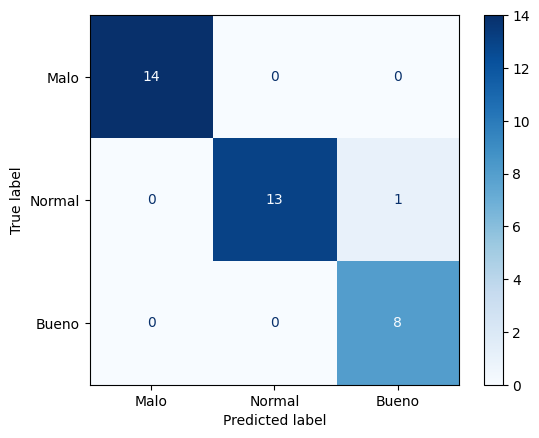

In [25]:
# Mátriz de confusión
confusion_matrix(y_test, test_preds)
# Visualización Gráfica
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, test_preds), display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()